In [15]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [16]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables


In [20]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table
measurement = Base.classes.measurement
station=Base.classes.station

In [22]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
from sqlalchemy import desc
for row in session.query(measurement.date).order_by(desc(measurement.date)).first():
    print(row)

2017-08-23


2017-08-23
2016-08-23


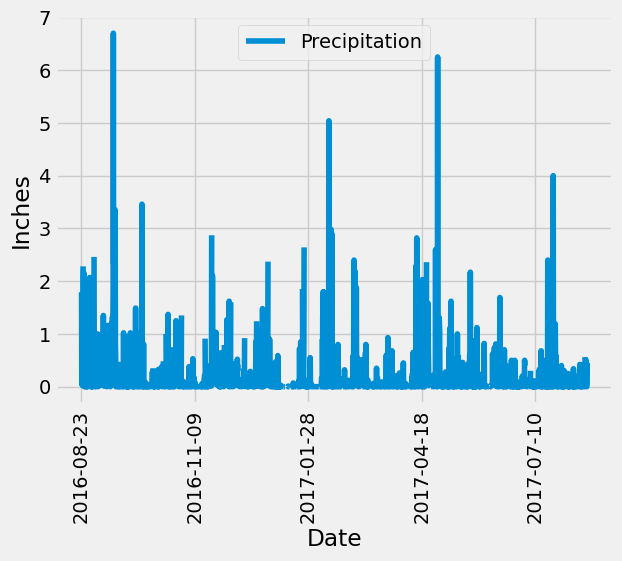

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
for row in session.query(measurement.date).order_by(desc(measurement.date)).first():
    print(row)

# Calculate the date one year from the last date in data set.
lastyear=dt.date(2017,8,23)-dt.timedelta(days=365)
print(lastyear)

# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date,measurement.prcp]
measurement_precipitation = session.query(*sel).\
    filter(measurement.date>=lastyear).all()
measurement_precipitation

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df=pd.DataFrame(measurement_precipitation,columns=["Date","Precipitation"])

# Sort the dataframe by date
df=df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x="Date",y="Precipitation",rot=90)
plt.ylabel("Inches")
plt.show()

In [25]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
total_number_stations=session.query(station.station).count()
print(total_number_stations)

9


In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
from sqlalchemy import func
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active=session.query(measurement.station).group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()[0]
print(most_active)
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station==most_active).all()

USC00519281


[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

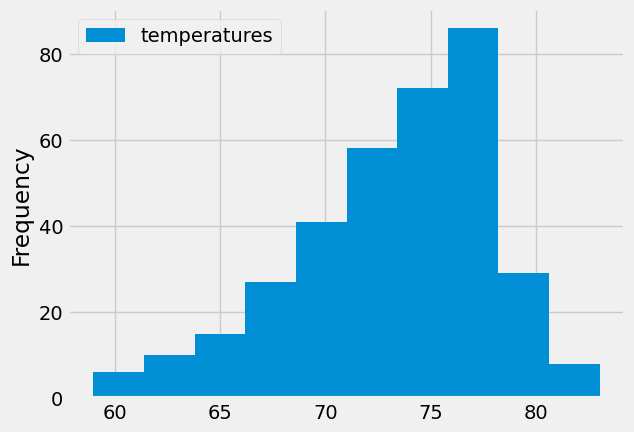

In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result=session.query(measurement.tobs).filter(measurement.station==most_active).filter(measurement.date>=lastyear).all()
df=pd.DataFrame(result,columns=["temperatures"])
df.plot.hist(bins=10)



# Close Session

In [30]:
# Close Session
session.close()